In [1]:
import pandas as pd
attrition_past = pd.read_csv('data/attrition_past.csv')
print(attrition_past.head())

  corporation  lastmonth_activity  lastyear_activity  number_of_employees  \
0        abcd                  78               1024                   12   
1        asdf                  14               2145                   20   
2        xyzz                 182               3891                   35   
3        acme                 101              10983                    2   
4        qwer                   0                118                   42   

   exited  
0       1  
1       0  
2       0  
3       1  
4       1  


In [2]:
print(attrition_past["exited"].mean())

0.5769230769230769


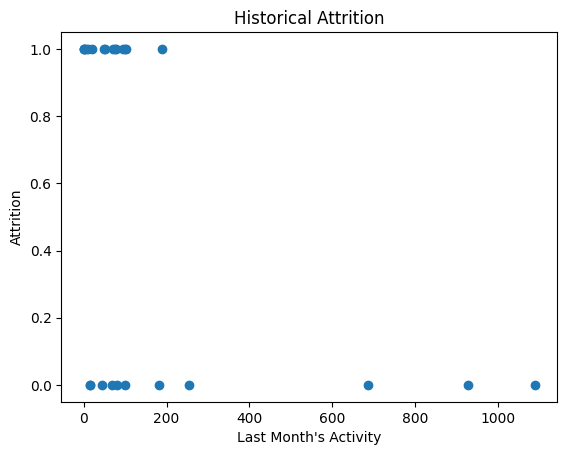

In [4]:
from matplotlib import pyplot as plt
plt.scatter(attrition_past["lastmonth_activity"], attrition_past["exited"])
plt.title("Historical Attrition")
plt.xlabel("Last Month\'s Activity")
plt.ylabel("Attrition")
plt.show()

In [5]:
x = attrition_past["lastmonth_activity"].values.reshape(-1, 1)
y = attrition_past["exited"].values.reshape(-1, 1)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


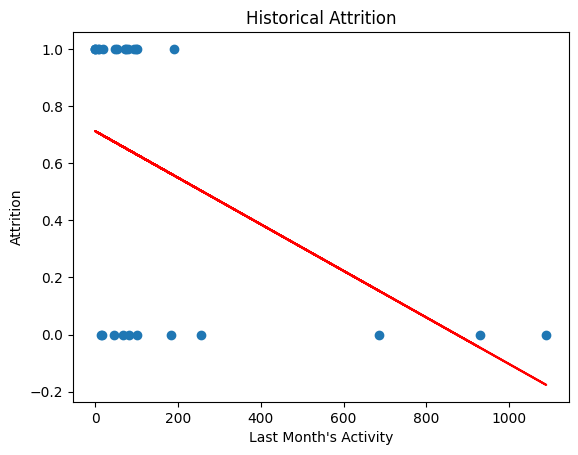

In [6]:
plt.scatter(attrition_past["lastmonth_activity"], attrition_past["exited"])
prediction = [regressor.coef_[0]*x+regressor.intercept_[0] for x in list(attrition_past["lastmonth_activity"])]
plt.plot(attrition_past["lastmonth_activity"], prediction, color='red')
plt.title("Historical Attrition")
plt.xlabel("Last Month\'s Activity")
plt.ylabel("Attrition")
plt.show()

In [7]:
attrition_past['predicted'] = regressor.predict(x)
print(attrition_past.head())

  corporation  lastmonth_activity  lastyear_activity  number_of_employees  \
0        abcd                  78               1024                   12   
1        asdf                  14               2145                   20   
2        xyzz                 182               3891                   35   
3        acme                 101              10983                    2   
4        qwer                   0                118                   42   

   exited  predicted  
0       1   0.648363  
1       0   0.700525  
2       0   0.563600  
3       1   0.629618  
4       1   0.711936  


In [8]:
attrition_future = pd.read_csv('data/attrition2.csv')
print(attrition_future.head())

  corporation  lastmonth_activity  lastyear_activity  number_of_employees
0        hhtn                 166               1393                   91
1        slfm                 824              16920                  288
2        pryr                  68                549                   12
3        ahva                 121               1491                   16
4        dmai                   4                 94                    2


In [9]:
x = attrition_future["lastmonth_activity"].values.reshape(-1, 1)
attrition_future["predicted"] = regressor.predict(x)
print(attrition_future.head())

  corporation  lastmonth_activity  lastyear_activity  number_of_employees  \
0        hhtn                 166               1393                   91   
1        slfm                 824              16920                  288   
2        pryr                  68                549                   12   
3        ahva                 121               1491                   16   
4        dmai                   4                 94                    2   

   predicted  
0   0.576641  
1   0.040352  
2   0.656514  
3   0.613317  
4   0.708676  


In [10]:
print(attrition_future.nlargest(5, 'predicted'))

   corporation  lastmonth_activity  lastyear_activity  number_of_employees  \
8         whsh                   0                 40                   52   
12        mike                   0                  0                   49   
24        pian                   0                 12                   19   
21        bass                   2                 19                 1400   
4         dmai                   4                 94                    2   

    predicted  
8    0.711936  
12   0.711936  
24   0.711936  
21   0.710306  
4    0.708676  


In [11]:
print(list(attrition_future.sort_values(by=['predicted'], ascending=False).loc[:, "corporation"]))

['whsh', 'pian', 'mike', 'bass', 'pevc', 'dmai', 'ynus', 'kdic', 'hlpd', 'angl', 'erin', 'oscr', 'grce', 'zamk', 'hlly', 'xkcd', 'dwgt', 'pryr', 'skct', 'frgv', 'ejdc', 'ahva', 'wlcj', 'hhtn', 'slfm', 'cred']


In [12]:
print(list(attrition_future.loc[attrition_future["predicted"]>0.7, "corporation"]))

['dmai', 'whsh', 'oscr', 'kdic', 'mike', 'pevc', 'erin', 'angl', 'bass', 'ynus', 'pian', 'hlpd']


In [13]:
the_median = attrition_past["predicted"].median()
prediction=list(1*(attrition_past['predicted']>the_median))
actual=list(attrition_past['exited'])

In [14]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(prediction, actual))

[[7 6]
 [4 9]]


In [15]:
conf_mat = confusion_matrix(prediction,actual)
precision = conf_mat[0][0]/(conf_mat[0][0]+conf_mat[0][1])
recall = conf_mat[0][0]/(conf_mat[0][0]+conf_mat[1][0])
print(precision)
print(recall)

0.5384615384615384
0.6363636363636364


In [16]:
x3 = attrition_past.loc[:, ["lastmonth_activity", "lastyear_activity", "number_of_employees"]].values.reshape(-1, 3)
y = attrition_past["exited"].values.reshape(-1, 1)
regressor_multi = LinearRegression()
regressor_multi.fit(x3, y)
attrition_future['predicted_multi'] = regressor_multi.predict(x3)

In [18]:
print(attrition_future.nlargest(5, 'predicted_multi'))

   corporation  lastmonth_activity  lastyear_activity  number_of_employees  \
11        ejdc                  95               1005                   61   
12        mike                   0                  0                   49   
13        pevc                   4                  6                 1686   
4         dmai                   4                 94                    2   
22        ynus                   9                 90                   12   

    predicted  predicted_multi  
11   0.634508         0.870000  
12   0.711936         0.815677  
13   0.708676         0.788110  
4    0.708676         0.755625  
22   0.704600         0.715362  


In [19]:
print(list(attrition_future.sort_values(by='predicted_multi', ascending=False).loc[:,'corporation']))

['ejdc', 'mike', 'pevc', 'dmai', 'ynus', 'wlcj', 'angl', 'pian', 'slfm', 'hlpd', 'frgv', 'hlly', 'oscr', 'cred', 'dwgt', 'hhtn', 'whsh', 'grce', 'pryr', 'xkcd', 'bass', 'ahva', 'erin', 'zamk', 'skct', 'kdic']


In [21]:
attrition_future['activity_per_employee']=attrition_future.loc[:,'lastmonth_activity']/attrition_future.loc[:,'number_of_employees']

attrition_past['activity_per_employee']=attrition_past.loc[:, 'lastmonth_activity']/attrition_past.loc[:,'number_of_employees']
x = attrition_past.loc[:,['activity_per_employee','lastmonth_activity', 'lastyear_activity', 'number_of_employees']].values.reshape(-1,4)
y = attrition_past['exited'].values.reshape(-1,1)

regressor_derived= LinearRegression()
regressor_derived.fit(x, y)
attrition_past['predicted3']=regressor_derived.predict(x)

x = attrition_future.loc[:,['activity_per_employee','lastmonth_activity', 'lastyear_activity', 'number_of_employees']].values.reshape(-1,4)
attrition_future['predicted3']=regressor_derived.predict(x)

In [22]:
print(list(attrition_future.sort_values(by='predicted3',ascending=False).loc[:,'corporation']))

['pevc', 'bass', 'frgv', 'hlpd', 'angl', 'oscr', 'zamk', 'whsh', 'mike', 'hhtn', 'ejdc', 'grce', 'pian', 'ynus', 'dmai', 'kdic', 'erin', 'slfm', 'dwgt', 'pryr', 'hlly', 'xkcd', 'skct', 'ahva', 'wlcj', 'cred']


In [23]:
themedian=attrition_past['predicted3'].median()
prediction=list(1*(attrition_past['predicted3']>themedian))
actual=list(attrition_past['exited'])
print(confusion_matrix(prediction,actual))

[[ 9  4]
 [ 2 11]]


In [24]:
conf_mat = confusion_matrix(prediction,actual)
precision = conf_mat[0][0]/(conf_mat[0][0]+conf_mat[0][1])
recall = conf_mat[0][0]/(conf_mat[0][0]+conf_mat[1][0])
print(precision)
print(recall)

0.6923076923076923
0.8181818181818182


In [28]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', random_state=0)
x = attrition_past["lastmonth_activity"].values.reshape(-1, 1)
y = attrition_past["exited"]
model.fit(x, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [30]:
attrition_past['logisticprediction']=model.predict_proba(x)[:,1]

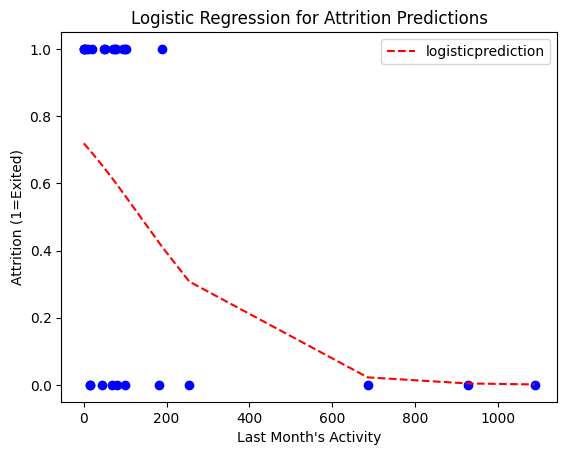

In [31]:
fig = plt.scatter(attrition_past['lastmonth_activity'],attrition_past['exited'], color='blue')
attrition_past.sort_values('lastmonth_activity').plot('lastmonth_activity','logisticprediction',ls='--', ax=fig.axes,color='red')
plt.title('Logistic Regression for Attrition Predictions')
plt.xlabel('Last Month\'s Activity')
plt.ylabel('Attrition (1=Exited)')
plt.show()

In [32]:
x = attrition_future['lastmonth_activity'].values.reshape(-1,1)
attrition_future['logisticprediction']=model.predict_proba(x)[:,1]
print(list(attrition_future.sort_values(by='logisticprediction', ascending=False).loc[:,'corporation']))

['whsh', 'pian', 'mike', 'bass', 'pevc', 'dmai', 'ynus', 'kdic', 'hlpd', 'angl', 'erin', 'oscr', 'grce', 'zamk', 'hlly', 'xkcd', 'dwgt', 'pryr', 'skct', 'frgv', 'ejdc', 'ahva', 'wlcj', 'hhtn', 'slfm', 'cred']
